In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error ,r2_score

/home/malak/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
data = pd.read_csv("kc_house_data.csv")
data = pd.DataFrame(data)
# print(data.head())
print(data)



               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242   

In [3]:
data.drop("date", axis=1, inplace=True)
data.drop("id",axis=1 ,inplace=True)


In [4]:
data["bathrooms"] = np.ceil(data["bathrooms"])
data["floors"] =np.ceil(data["floors"])

In [5]:
print(data)

          price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3        1.0         1180      5650     1.0   
1      538000.0         3        3.0         2570      7242     2.0   
2      180000.0         2        1.0          770     10000     1.0   
3      604000.0         4        3.0         1960      5000     1.0   
4      510000.0         3        2.0         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21608  360000.0         3        3.0         1530      1131     3.0   
21609  400000.0         4        3.0         2310      5813     2.0   
21610  402101.0         2        1.0         1020      1350     2.0   
21611  400000.0         3        3.0         1600      2388     2.0   
21612  325000.0         2        1.0         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0          3      7        1180              0   
1  

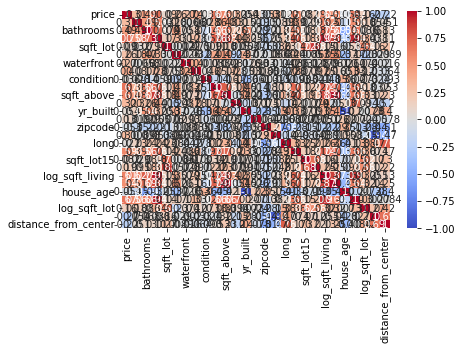

In [18]:
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)

plt.show()


In [7]:
data["sqt"] = data["sqft_lot"] *data["sqft_living"]

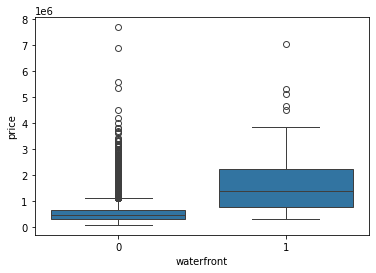

waterfront
0    21450
1      163
Name: count, dtype: int64

In [8]:
sns.boxplot(x='waterfront', y='price', data=data)
plt.show()

data['waterfront'].value_counts()



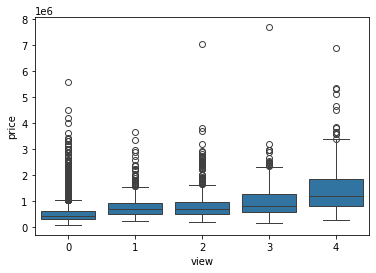

waterfront
0    21450
1      163
Name: count, dtype: int64

In [9]:
sns.boxplot(x='view', y='price', data=data)
plt.show()

data['waterfront'].value_counts()

In [10]:
data.groupby('waterfront')['price'].mean()


waterfront
0    5.315636e+05
1    1.661876e+06
Name: price, dtype: float64

In [11]:
# data["log_price"] = np.log(data["price"])
data["log_sqft_living"] = np.log(data["sqft_living"])
data["log_sqft_above"] =np.log(data["sqft_above"])
data["house_age"] = 2025 - data["yr_built"]
data["total_space"] = data["sqft_living"] + data["sqft_basement"]  
# data["price_per_sqft"] = data["price"] / data["sqft_living"]       

data["log_sqft_lot"] = np.log(data["sqft_lot"] + 1)  

data["lat_long_interaction"] = data["lat"] * data["long"]
data["distance_from_center"] = np.sqrt((data["lat"] - 47.6)**2 + (data["long"] + 122.3)**2)









In [12]:
print(data["sqt"])

0         6667000
1        18611940
2         7700000
3         9800000
4        13574400
           ...   
21608     1730430
21609    13428030
21610     1377000
21611     3820800
21612     1097520
Name: sqt, Length: 21613, dtype: int64


In [13]:
X = data.drop(["price"],axis=1)
Y =data["price"]

x_train ,x_test ,y_train ,y_test =train_test_split(X,Y ,test_size=0.2 ,random_state=42)

In [14]:
lr =LinearRegression()
lr.fit(x_train ,y_train)

y_predict_train = lr.predict(x_train)
r2 =r2_score(y_train ,y_predict_train)
print("train r2 score" , r2)
print("train rmse" , np.sqrt(mean_squared_error(y_train ,y_predict_train)))

print("")
y_predict_test =lr.predict(x_test)
print("test r2 score" , r2_score(y_test ,y_predict_test))
print("test rmse" , np.sqrt(mean_squared_error(y_test ,y_predict_test)))




train r2 score 0.7472067861560072
train rmse 181733.54933726168

test r2 score 0.7423603703023579
test rmse 197355.29424052328


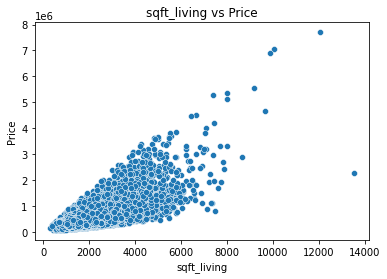

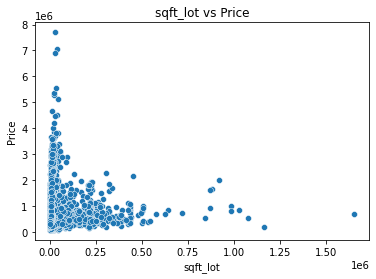

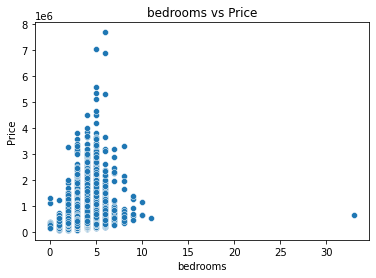

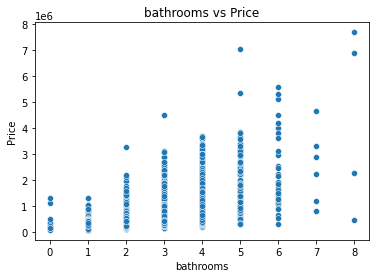

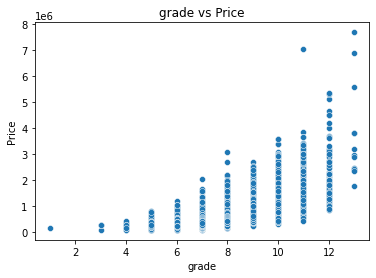

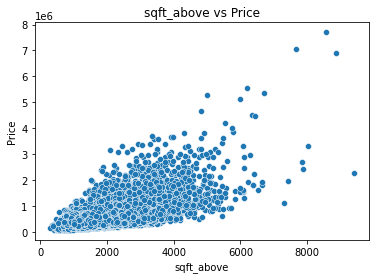

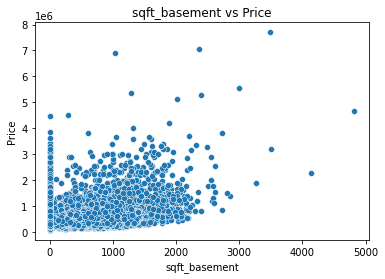

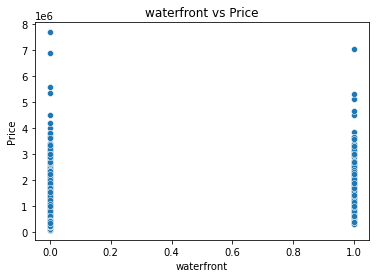

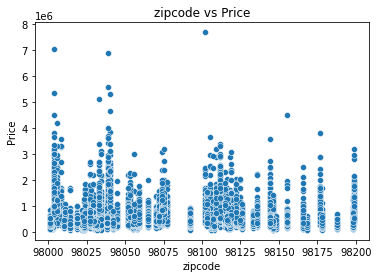

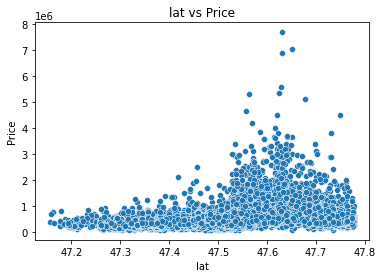

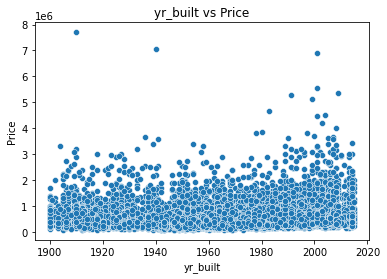

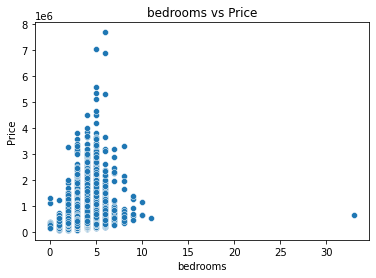

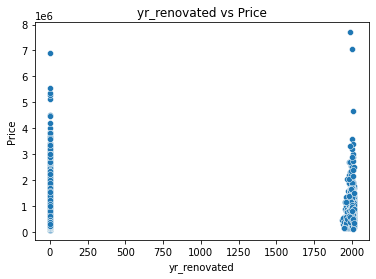

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features you want to compare with price
features = ["sqft_living", "sqft_lot", "bedrooms", "bathrooms", "grade", "sqft_above", "sqft_basement", "waterfront" ,"zipcode" ,"lat" ,"yr_built" ,"bedrooms" ,"yr_renovated"]

for feature in features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=data[feature], y=data["price"])
    plt.title(f"{feature} vs Price")
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.show()
